# US Regional Sales Data Analysis and Prediction

## Project Overview

This project focuses on analyzing and predicting sales performance across different regions in the US, based on a comprehensive dataset containing information on various sales channels such as In-Store, Online, Distributor, and Wholesale. With 7,991 rows and 16 columns, the dataset provides insights into sales transactions, customer interactions, and product performance, enabling detailed analysis of sales patterns and trends. The goal of this project is to uncover meaningful insights from the data and build predictive models to forecast prices and optimize sales strategies.

## Source

This dataset is available on Kaggle in the following link:

> https://www.kaggle.com/datasets/talhabu/us-regional-sales-data/data

## Data Dictionary

The dataset includes detailed information on sales orders, customer interactions, and pricing. Below is a breakdown of the columns in the dataset:

- **OrderNumber**: A unique identifier for each order.
- **Sales Channel**: The channel through which the sale was made (In-Store, Online, Distributor, Wholesale).
- **WarehouseCode**: Code representing the warehouse involved in the order.
- **ProcuredDate**: Date when the products were procured.
- **OrderDate**: Date when the order was placed.
- **ShipDate**: Date when the order was shipped.
- **DeliveryDate**: Date when the order was delivered.
- **SalesTeamID**: Identifier for the sales team involved.
- **CustomerID**: Identifier for the customer.
- **StoreID**: Identifier for the store.
- **ProductID**: Identifier for the product.
- **Order Quantity**: Quantity of products ordered.
- **Discount Applied**: Applied discount for the order.
- **Unit Cost**: Cost of a single unit of the product.
- **Unit Price**: Price at which the product was sold.

This dataset serves as a valuable resource for analyzing sales trends, identifying high-performing products, assessing the effectiveness of different sales channels, and optimizing pricing strategies across various regions.

## Problem Statement

### Data Analysis and Visualization
1. **Exploratory Data Analysis**: The objective of EDA is to analyze the data and find hidden patterns present in the dataset to visualize the data for following analysis and predective modeling.
2. **Time Series Analysis**: Plot sales trends over time to identify seasonal patterns and changes in demand.
3. **Sales Channel Comparison**: Compare sales performance across different sales channels using bar charts or line graphs.
4. **Product Analysis**: Visualize the distribution of sales across different products using pie charts or bar plots to determine popular products.
5. **Discount Analysis**: Analyze the impact of discounts on sales performance using scatter plots or line graphs.
6. **Regional Performance**: Create geographic maps to visualize sales performance across different regions for better insights into regional trends.

These visualizations and models will provide valuable insights into sales patterns and help optimize pricing strategies to improve overall sales performance.




### Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import os

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "US_Regional_Sales_Data.csv")

### Load Data and Get General Information about Data

In [3]:
# Load data
df = pd.read_csv(csv_path)

In [4]:
# Show 1st 5 observations of dataset to get an idea about the data present in each feature
df.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18  14/6/18   
1  SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18  22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18  21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   2/6/18   
4  SO - 000105   Distributor  WARE-NMK1003      10/4/18   31/5/18  16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0      19/6/18          USD             6           15       259          12   
1       2/7/18          USD            14           20       196          27   
2       1/7/18          USD            21           16       213          16   
3       7/6/18          USD            28           48       107          23   
4      26/6/18          USD            22           49       111          26   

   Order Quantity  Discount Applied Unit Cost Unit Price  
0               5             0.075  1,001.18   1,963.10  
1               3             0.075  3,348.66   3,939.60  
2               1             0.050    781.22   1,775.50  
3               8             0.075  1,464.69   2,324.90  
4               8             0.100  1,476.14   1,822.40

In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 7991
Number of features: 16


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
# num_cols = df.select_dtypes(exclude= ["object"]).columns
# print(f"Number of numeric features: {len(num_cols)}")

FEATURE DESCRIPTION
OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Cost            object
Unit Price           object
dtype: object


### Key Findings

From the above feature description it is found that,
1. There are 4 features containing dates but they are present as **object**. These features needs to be converted to date type for time series analysis.
2. Unit Cost and Unit Price features are present as **object** but they should be numeric type. It is observed that due to the presence of comma(,) in the values they are treated as object type. The comma should be removed and they should be converted to numric type for all types of analysis and predictions.

In [7]:
# Missing Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value is present in any of the feature")

MISSING VALUE DETECTION
No missing value is present in any of the feature


In [8]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE OBSERVATION DETECTION")
print("=" * 60)
print(f"Number of duplication observations: {df.duplicated().sum()}")

DUPLICATE OBSERVATION DETECTION
Number of duplication observations: 0


### Data Cleaning  & Feature Engineering

Before proceding further analysis some data cleaning and feature engineering tasks should be performed like,

1. Convert the date type features present as object should be converted to date type.
2. Clean the data in Unit Price and Unit Cost and convert it to numeric type.
3. Add a new feature Sales(Unit Price * Order Quantity) for time series analysis of Sales.

In [9]:
# Convert Date features
df["ProcuredDate"] = pd.to_datetime(df["ProcuredDate"])
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["ShipDate"] = pd.to_datetime(df["ShipDate"])
df["DeliveryDate"] = pd.to_datetime(df["DeliveryDate"])

In [10]:
# Sanity check
df.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Cost                   object
Unit Price                  object
dtype: object

In [11]:
# Remove comma(,) from Unit Cost and Unit Price and convert it to Numeric data
df["Unit Cost"] = pd.to_numeric(df["Unit Cost"].str.replace(",", ""), errors= "coerce")
df["Unit Price"] = pd.to_numeric(df["Unit Price"].str.replace(",", ""), errors= "coerce")

In [12]:
# Sanity check
df.dtypes

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Cost                  float64
Unit Price                 float64
dtype: object

In [13]:
# Check the converted data
df.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-02-06   
4  SO - 000105   Distributor  WARE-NMK1003   2018-10-04 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0   2018-06-19          USD             6           15       259          12   
1   2018-02-07          USD            14           20       196          27   
2   2018-01-07          USD            21           16       213          16   
3   2018-07-06          USD            28           48       107          23   
4   2018-06-26          USD            22           49       111          26   

   Order Quantity  Discount Applied  Unit Cost  Unit Price  
0               5             0.075    1001.18      1963.1  
1               3             0.075    3348.66      3939.6  
2               1             0.050     781.22      1775.5  
3               8             0.075    1464.69      2324.9  
4               8             0.100    1476.14      1822.4

In [14]:
df["Sales"] = df["Order Quantity"] * df["Unit Price"]

In [15]:
# Sanity check
df.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-02-06   
4  SO - 000105   Distributor  WARE-NMK1003   2018-10-04 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0   2018-06-19          USD             6           15       259          12   
1   2018-02-07          USD            14           20       196          27   
2   2018-01-07          USD            21           16       213          16   
3   2018-07-06          USD            28           48       107          23   
4   2018-06-26          USD            22           49       111          26   

   Order Quantity  Discount Applied  Unit Cost  Unit Price    Sales  
0               5             0.075    1001.18      1963.1   9815.5  
1               3             0.075    3348.66      3939.6  11818.8  
2               1             0.050     781.22      1775.5   1775.5  
3               8             0.075    1464.69      2324.9  18599.2  
4               8             0.100    1476.14      1822.4  14579.2

In [16]:
# Separate Month ant Year of Order Date to anlyze yearly and Monthly sales
df["OrderYear"] = df["OrderDate"].dt.year.astype("object")
df["OrderMonth"] = df["OrderDate"].dt.month.astype("object")
df["OrderDayofweek"] = df["OrderDate"].dt.dayofweek.astype("object")

In [17]:
# Sanity check
df.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-02-06   
4  SO - 000105   Distributor  WARE-NMK1003   2018-10-04 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0   2018-06-19          USD             6           15       259          12   
1   2018-02-07          USD            14           20       196          27   
2   2018-01-07          USD            21           16       213          16   
3   2018-07-06          USD            28           48       107          23   
4   2018-06-26          USD            22           49       111          26   

   Order Quantity  Discount Applied  Unit Cost  Unit Price    Sales OrderYear  \
0               5             0.075    1001.18      1963.1   9815.5      2018   
1               3             0.075    3348.66      3939.6  11818.8      2018   
2               1             0.050     781.22      1775.5   1775.5      2018   
3               8             0.075    1464.69      2324.9  18599.2      2018   
4               8             0.100    1476.14      1822.4  14579.2      2018   

  OrderMonth OrderDayofweek  
0          5              3  
1          5              3  
2          5              3  
3          5              3  
4          5              3

In [18]:
# Calculate Profit
df["Profit"] = (df["Unit Price"] - df["Unit Cost"]) /df["Unit Cost"] * 100

In [19]:
# Sanity Check
df.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-02-06   
4  SO - 000105   Distributor  WARE-NMK1003   2018-10-04 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  _ProductID  \
0   2018-06-19          USD             6           15  ...          12   
1   2018-02-07          USD            14           20  ...          27   
2   2018-01-07          USD            21           16  ...          16   
3   2018-07-06          USD            28           48  ...          23   
4   2018-06-26          USD            22           49  ...          26   

   Order Quantity  Discount Applied  Unit Cost  Unit Price    Sales  \
0               5             0.075    1001.18      1963.1   9815.5   
1               3             0.075    3348.66      3939.6  11818.8   
2               1             0.050     781.22      1775.5   1775.5   
3               8             0.075    1464.69      2324.9  18599.2   
4               8             0.100    1476.14      1822.4  14579.2   

   OrderYear OrderMonth OrderDayofweek      Profit  
0       2018          5              3   96.078627  
1       2018          5              3   17.647059  
2       2018          5              3  127.272727  
3       2018          5              3   58.729834  
4       2018          5              3   23.457125  

[5 rows x 21 columns]

### Time Series Analysis

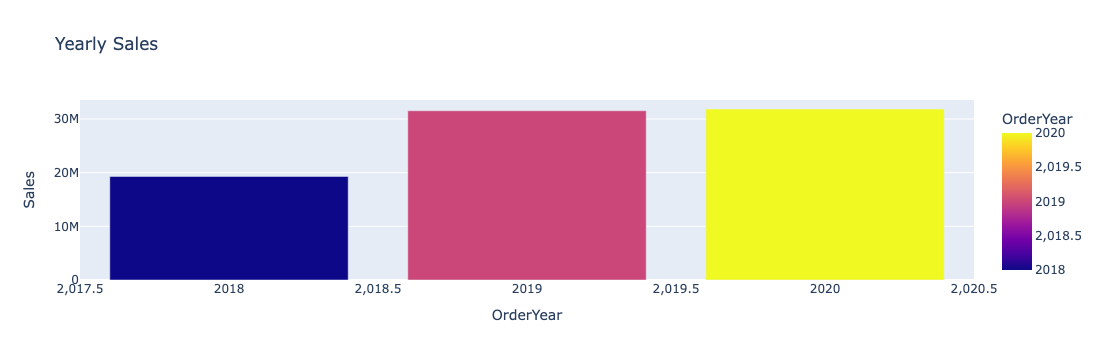

In [20]:
# Plot Sale Over Years
yearly_sales = df.groupby("OrderYear").sum("Sales").reset_index()
px.bar(yearly_sales, x= "OrderYear", y= "Sales", title= "Yearly Sales", color= "OrderYear")

### Key Finings

- Total Sales increased in 2019 than 2018 is around 50% but increase in total sales very in low in 2020 that 2019.

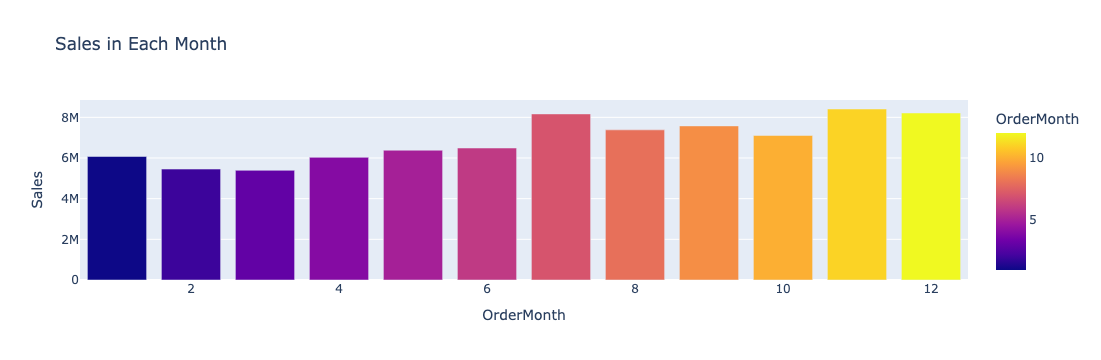

In [21]:
# Plot Sales in months
monthly_sales = df.groupby(["OrderMonth"]).sum("Sales").reset_index()
px.bar(monthly_sales, x= "OrderMonth", y = "Sales", color= "OrderMonth", title="Sales in Each Month")

### Key Findings

- Total Sales is highr in **July-December** compared to **January-June**.

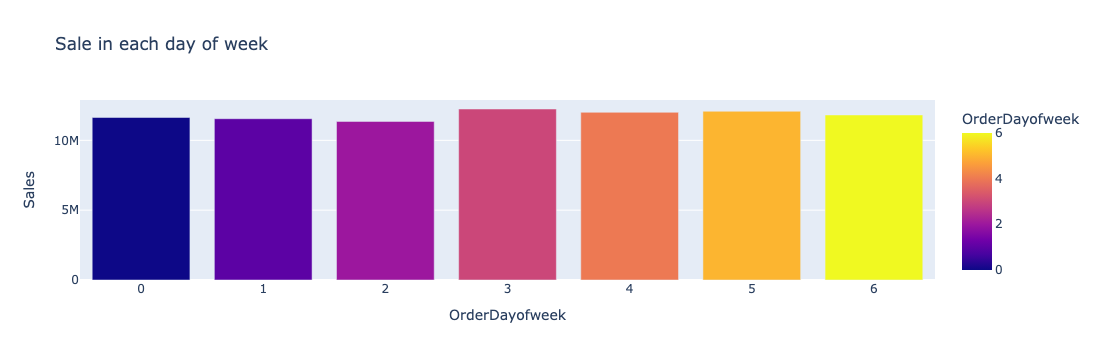

In [22]:
# Plot Sales in Week Days
week_sales = df.groupby("OrderDayofweek").sum("Sales").reset_index()
px.bar(week_sales, x= "OrderDayofweek", y= "Sales", color="OrderDayofweek", title="Sale in each day of week")

### Key Findings

- Sales in each day of week are almost same but in **Wednesday(3), Thursday(4) and Friday(5)** are slightly higher.

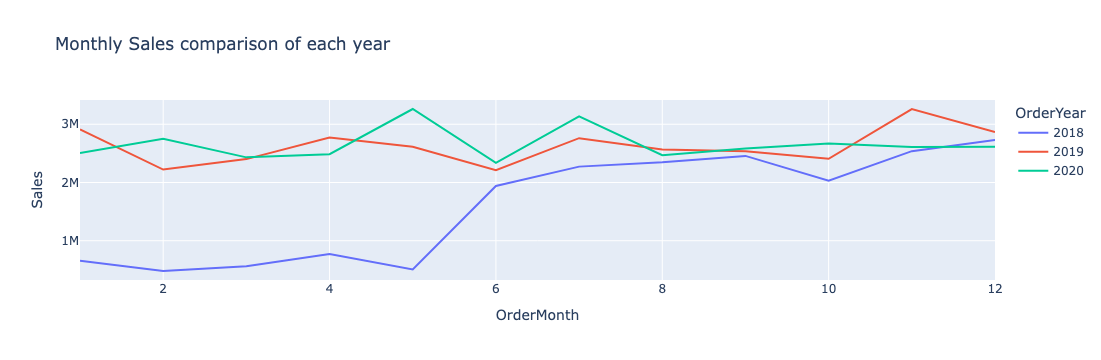

In [23]:
# Comparison of Monthly Sale in each Year
year_monthly_sales = df.groupby(["OrderYear", "OrderMonth"]).sum("Sales").reset_index()
px.line(year_monthly_sales, x = "OrderMonth", y= "Sales", color= "OrderYear", title= "Monthly Sales comparison of each year")

### Key Findings

- In 2018 Sales increased very high from Month of **June** and remain hight till the end of year.
- In 2019 and 2020 sales was maintaind high throughout the year.

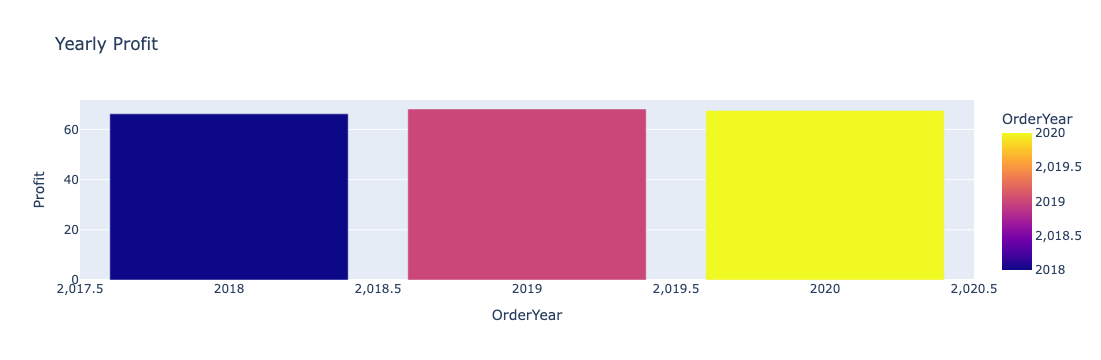

In [24]:
# Plot Yearly Profit
yearly_profit = df.groupby("OrderYear").mean("Profit").reset_index()
px.bar(yearly_profit, x= "OrderYear", y= "Profit", color= "OrderYear", title= " Yearly Profit")

### Kay Findings

- Profit in each year is alsomt same around 67%.

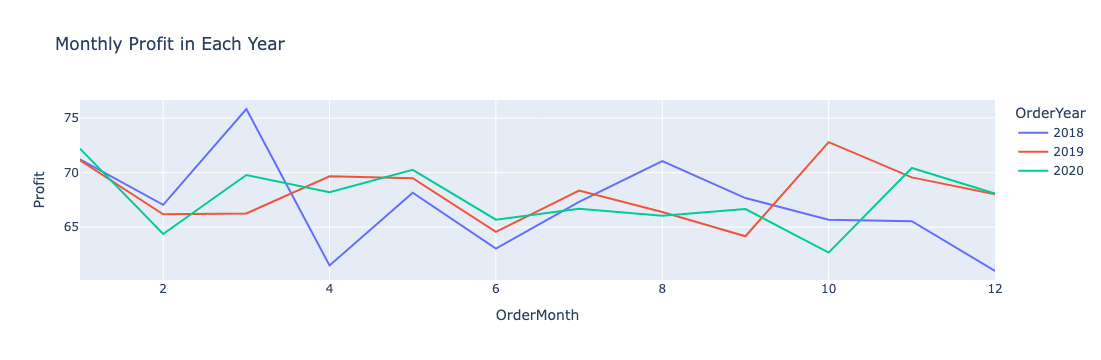

In [25]:
# Comparison of Profit each month of year
monthly_profits = df.groupby(["OrderYear", "OrderMonth"]).mean("Profit").reset_index()
px.line(monthly_profits, x= "OrderMonth", y= "Profit", color="OrderYear", title="Monthly Profit in Each Year")

### Key Findings

- Highest Profit made in **March, 2018**.
- Lowest Profit made in **December, 2018**
- In 2019 and 2020 a stady profit was maintained between 65% to 70%.

### Sales Channel Comparison

In [26]:
# Check the count of observations for each sales channel
df["Sales Channel"].value_counts()

Sales Channel
In-Store       3298
Online         2425
Distributor    1375
Wholesale       893
Name: count, dtype: int64

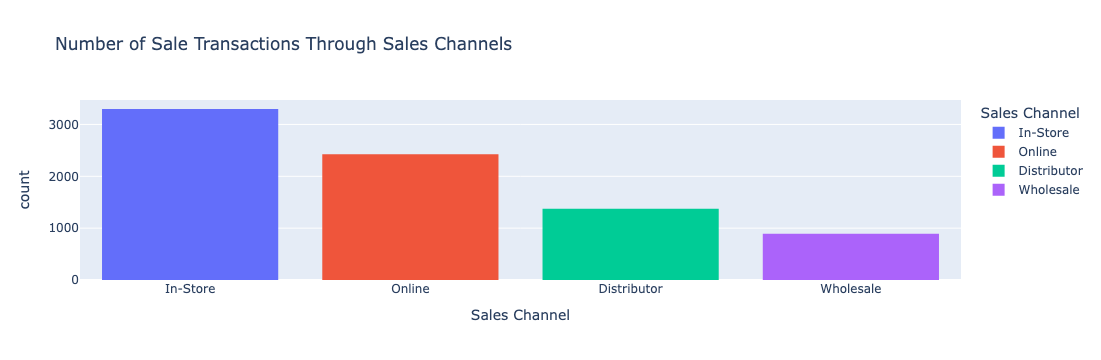

In [27]:
# Visualize the the count of observations for each sales channel
px.histogram(df, x = "Sales Channel", color= "Sales Channel", title= "Number of Sale Transactions Through Sales Channels")

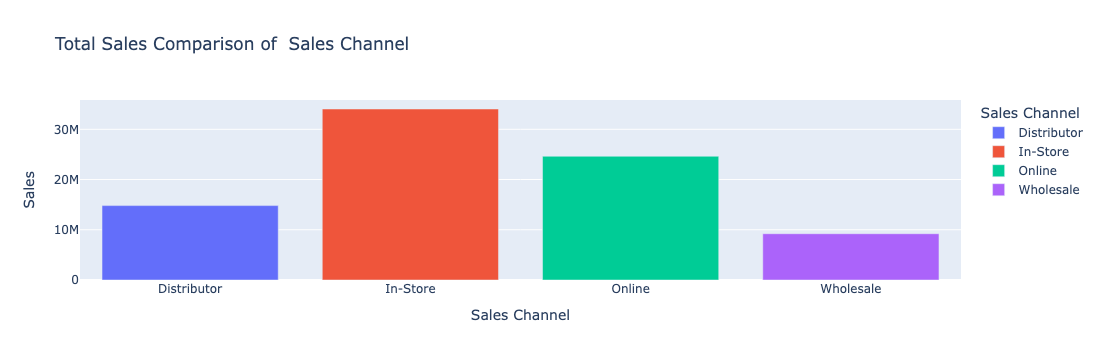

In [28]:
# Total Sales in each sales channel
total_sales = df.groupby("Sales Channel").sum("Sales").reset_index()
px.bar(
    total_sales,
    x= "Sales Channel",
    y = "Sales",
    color= "Sales Channel",
    title= "Total Sales Comparison of  Sales Channel"
)

### Key Findings

- Highest Sale in terms of number transaction or amount through the **In-Store** channel.
- Lowest Sale in terms of number transaction or amount through the **Wholesale** channel.
- Sales through In-Store and Online are much higher than the sales through Distributor and Wholesale.

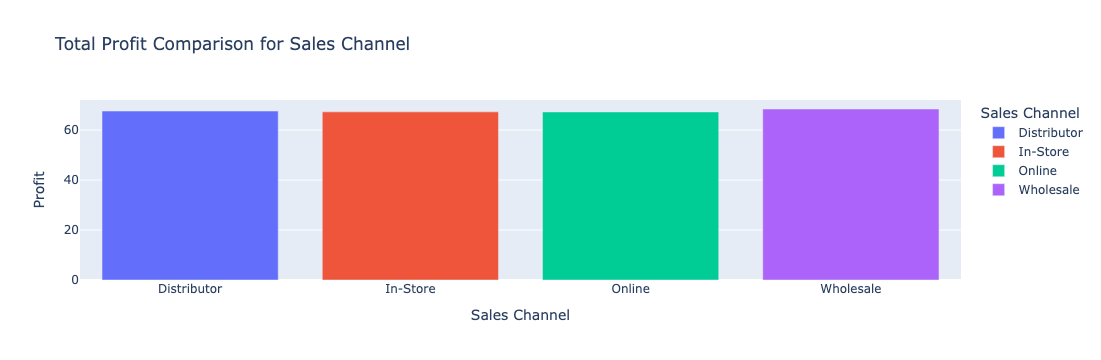

In [29]:
# Total Profit comparison in each sales channel
channel_profit = df.groupby("Sales Channel").mean("Profit").reset_index()
px.bar(
    channel_profit,
    x= "Sales Channel",
    y= "Profit",
    color= "Sales Channel",
    title= "Total Profit Comparison for Sales Channel"
)

### Key Findings

- Total profit is almost same in all sales channel though slight higher in **Wholesale** channel.

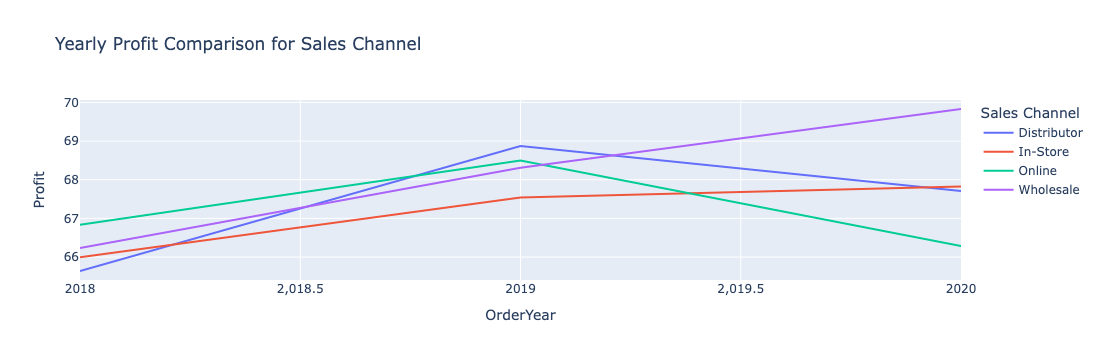

In [30]:
# Yearly Profit comparison in each sales channel
channel_yearly_profit = df.groupby(["Sales Channel", "OrderYear"]).mean("Profit").reset_index()
px.line(
    channel_yearly_profit,
    x= "OrderYear",
    y= "Profit",
    color= "Sales Channel",
    title= "Yearly Profit Comparison for Sales Channel"
)

### Key Findings

- Profit in **Wholesale** has increased in each year than the previous year.
- Profit in **Distributor** and **Online** channel has increased in the year **2019** than the other two channels but falls in **2020**. Profit in **Online** decreased drastically in the year **2020** than the other three channels.

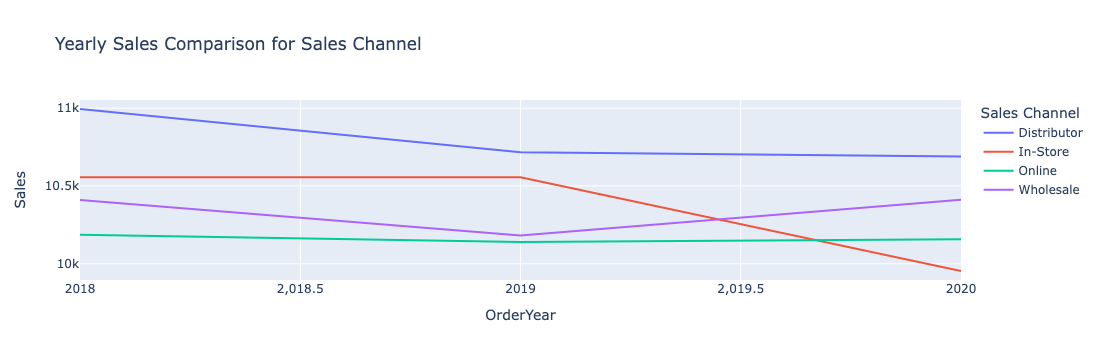

In [31]:
# Yearly Sales comparison in each sales channel
channel_yearly_sales = df.groupby(["Sales Channel", "OrderYear"]).mean("Sales").reset_index()
px.line(
    channel_yearly_sales,
    x= "OrderYear",
    y= "Sales",
    color= "Sales Channel",
    title= "Yearly Sales Comparison for Sales Channel"
)

### Key Findings

- Sales through **In-Store** has decreased heavily in the year **2020** than previous two years.
- Sales through **Distributor** has decreased in the year **2019 & 2020** than previous year.
- Sales through **Wholesale** has decreaded in the year **2019** but again increased in **2020**.
- Sales through **Online** is the lowest in all but maintaining a steady sale in all three years.

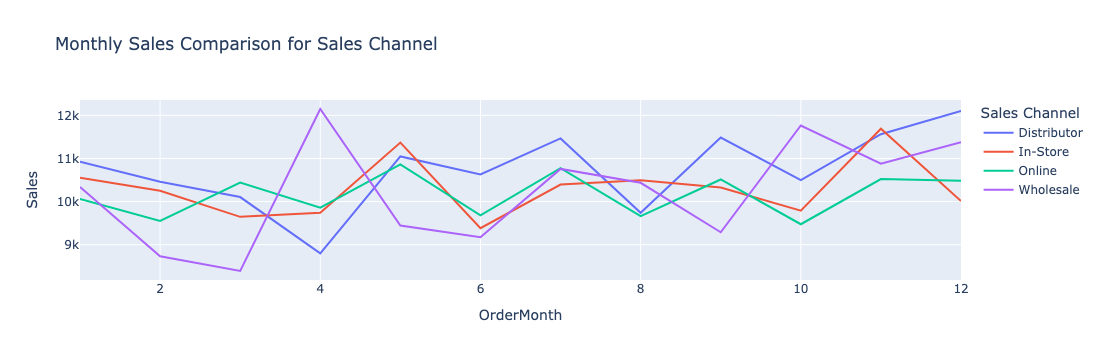

In [32]:
# Monthly Sales comparison in each sales channel
channel_monthly_sales = df.groupby(["Sales Channel", "OrderMonth"]).mean("Sales").reset_index()
px.line(
    channel_monthly_sales,
    x= "OrderMonth",
    y= "Sales",
    color= "Sales Channel",
    title= "Monthly Sales Comparison for Sales Channel"
)

### Product Analysis

In [44]:
# Find Product wise tolat sale, total order quantity
product_sales = df.groupby("_ProductID").sum(["Sales", "Order Quantity"]).reset_index().sort_values("Order Quantity", ascending=False)
product_sales["_ProductID"] = product_sales["_ProductID"].astype("object")
product_sales

_ProductID  _SalesTeamID  _CustomerID  _StoreID  Order Quantity  \
22         23          2630         4830     36037             956   
36         37          2834         4912     36840             896   
7           8          2848         5072     34554             879   
3           4          2870         4959     34846             878   
39         40          2505         4722     36631             855   
40         41          2788         4726     31963             854   
21         22          2309         4161     30459             837   
37         38          2679         4347     33765             832   
26         27          2626         4546     36883             830   
11         12          2703         4663     35192             827   
1           2          2484         4261     30090             819   
28         29          2522         4418     32900             818   
45         46          2519         4512     33648             817   
10         11          2558         4766     32037             814   
15         16          2696         4648     32591             814   
4           5          2665         4568     34808             811   
27         28          2542         4452     32079             809   
24         25          2549         4338     35048             809   
16         17          2364         3735     34600             807   
19         20          2577         4288     31314             798   
20         21          2423         4359     31615             789   
44         45          2509         4178     31926             786   
12         13          2634         4427     33237             777   
18         19          2360         4194     29463             772   
8           9          2328         4322     29811             772   
42         43          2250         4019     29335             771   
34         35          2473         4120     30040             770   
35         36          2672         4659     31514             769   
30         31          2435         4610     28147             768   
13         14          2291         3974     31281             766   
2           3          2426         4310     32104             764   
23         24          2312         4430     29710             759   
9          10          2516         4212     31727             755   
6           7          2437         4264     31339             735   
25         26          2287         4095     27865             723   
38         39          2460         4453     29863             717   
32         33          2366         4421     30145             695   
0           1          2183         4082     27916             681   
46         47          2214         3919     25561             680   
5           6          2220         3977     27487             663   
31         32          2106         3976     25320             660   
14         15          2238         4161     30459             658   
29         30          2214         4153     30581             656   
41         42          2072         3787     25389             652   
17         18          2267         4185     29900             644   
33         34          2114         3959     27130             635   
43         44          1870         3257     23996             585   

    Discount Applied  Unit Cost  Unit Price      Sales        Profit  
22            21.600  285208.84    464196.1  2358788.6  13557.927717  
36            21.175  295559.56    458400.6  2052886.7  12962.681073  
7             24.925  259059.59    429094.8  1976895.3  13301.630691  
3             25.125  303646.93    485287.7  2071546.2  13668.026083  
39            21.250  277627.97    438736.1  2130841.2  12390.254499  
40            20.350  270037.15    430240.5  2049958.8  11607.991167  
21            18.700  219818.49    358409.8  1742422.1  11484.294765  
37            19.575  256450.71    406870.9  1868140.9  12513.682703  
26 

Text(0.5, 1.0, 'Top Selling 5 Products')

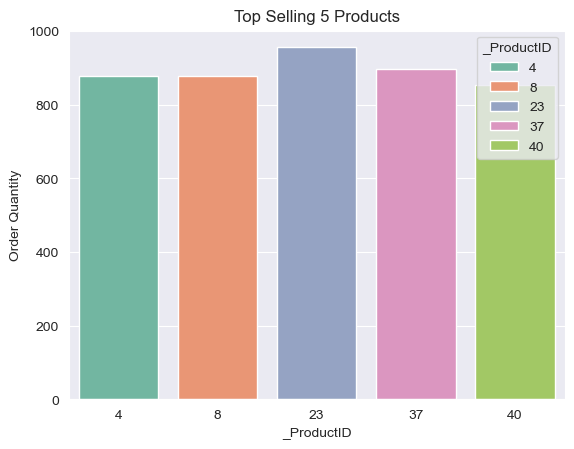

In [55]:
# Visualise Most Popular 5 Products
sns.barplot(data= product_sales.head(), x= "_ProductID", y = "Order Quantity", hue= "_ProductID", palette="Set2")
plt.title("Top Selling 5 Products")

Text(0.5, 1.0, 'Slow Moving 5 Products')

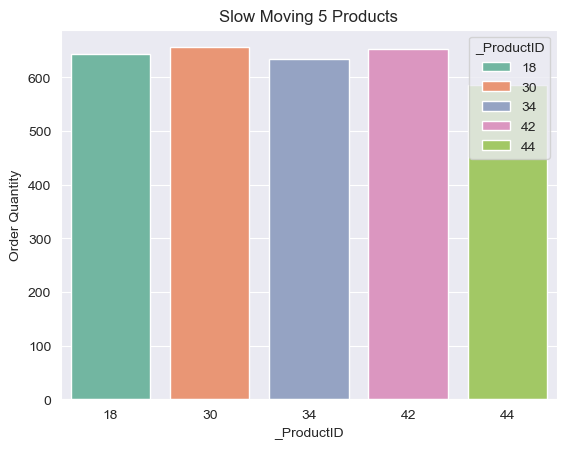

In [54]:
# Visualize Slow moving 5 products
sns.barplot(data= product_sales.tail(), x= "_ProductID", y = "Order Quantity", hue= "_ProductID", palette="Set2")
plt.title("Slow Moving 5 Products")

### Key Findings

- Product Id 23 is the most selling Product.
- Product Id 44 is the least selling Product.

### Discount Analysis

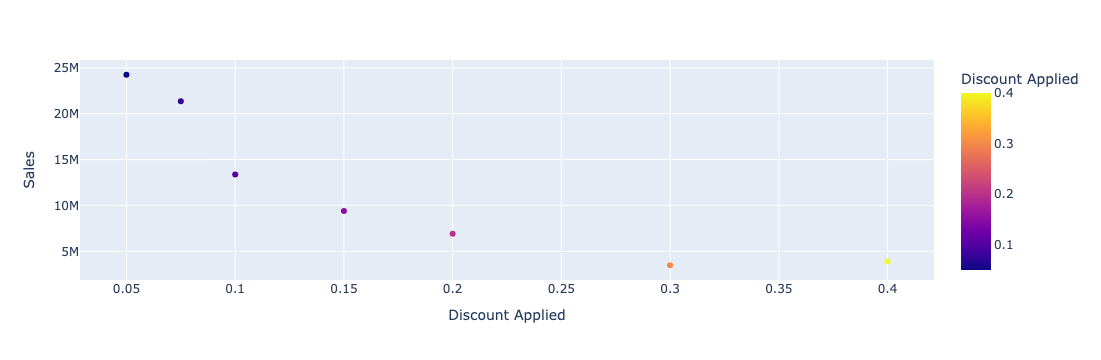

In [60]:
discount_sales= df.groupby("Discount Applied").sum("Sales").reset_index()
px.scatter(discount_sales, x= "Discount Applied", y= "Sales", color= "Discount Applied")

### Key Findings

- Low Discount Higher sales
- As percentage of discount increases sale decreases.

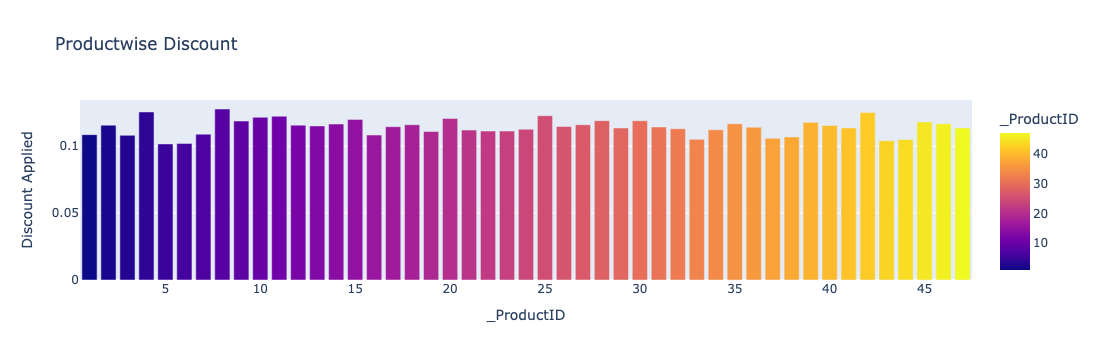

In [61]:
product_discount = df.groupby("_ProductID").mean("Discount Applied").reset_index().sort_values("Discount Applied")
px.bar(product_discount, x= "_ProductID", y= "Discount Applied", color="_ProductID", title= "Productwise Discount")

### Key Findings

- The most selling product 23 has 11% discount whereas least selling product 44 has 10% discount. This indicates that discount don't play any role in sales.

### Data Cleaning for Data Modelling

In [63]:
# Drop the features those were added for data visualization
df.drop([
    "Sales",
    "OrderYear",
    "OrderMonth",
    "OrderDayofweek",
    "Profit"
], axis= 1, inplace= True)

In [65]:
# Drop CurrencyCode feature as it contains same value for each observationas so it is not adding any pattern to the data for modelling
# Drop OrderNumber feature as it contains unique value for each observationas so it is not adding any pattern to the data for modelling
df.drop(["OrderNumber", "CurrencyCode"], axis= 1, inplace= True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sales Channel     7991 non-null   object        
 1   WarehouseCode     7991 non-null   object        
 2   ProcuredDate      7991 non-null   datetime64[ns]
 3   OrderDate         7991 non-null   datetime64[ns]
 4   ShipDate          7991 non-null   datetime64[ns]
 5   DeliveryDate      7991 non-null   datetime64[ns]
 6   _SalesTeamID      7991 non-null   int64         
 7   _CustomerID       7991 non-null   int64         
 8   _StoreID          7991 non-null   int64         
 9   _ProductID        7991 non-null   int64         
 10  Order Quantity    7991 non-null   int64         
 11  Discount Applied  7991 non-null   float64       
 12  Unit Cost         7991 non-null   float64       
 13  Unit Price        7991 non-null   float64       
dtypes: datetime64[ns](4), fl

In [69]:
# Calculate number of days to deliver a product after shiping and add as a new feature
df["DeliveryDays"] = (df["DeliveryDate"] - df["ShipDate"]).dt.days

In [70]:
# Sanity check
df.head()

Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate DeliveryDate  \
0      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   2018-06-19   
1        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   2018-02-07   
2   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   2018-01-07   
3     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-02-06   2018-07-06   
4   Distributor  WARE-NMK1003   2018-10-04 2018-05-31 2018-06-16   2018-06-26   

   _SalesTeamID  _CustomerID  _StoreID  _ProductID  Order Quantity  \
0             6           15       259          12               5   
1            14           20       196          27               3   
2            21           16       213          16               1   
3            28           48       107          23               8   
4            22           49       111          26               8   

   Discount Applied  Unit Cost  Unit Price  DeliveryDays  
0             0.075    1001.18      1963.1             5  
1             0.075    3348.66      3939.6          -135  
2             0.050     781.22      1775.5          -165  
3             0.075    1464.69      2324.9           150  
4             0.100    1476.14      1822.4            10

In [80]:
# Check negetive number of days in delivery
df[df["DeliveryDays"] < 0]

Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
1           Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2      Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
5           Online  WARE-PUJ1005   2017-12-31 2018-05-31 2018-08-06   
6         In-Store  WARE-XYS1001   2017-12-31 2018-05-31 2018-08-06   
7         In-Store  WARE-PUJ1005   2018-10-04 2018-05-31 2018-06-26   
...            ...           ...          ...        ...        ...   
7965     Wholesale  WARE-XYS1001   2020-09-26 2020-12-28 2021-11-01   
7973        Online  WARE-NMK1003   2020-09-26 2020-12-28 2021-06-01   
7975        Online  WARE-XYS1001   2020-09-26 2020-12-28 2021-11-01   
7978     Wholesale  WARE-PUJ1005   2020-09-26 2020-12-29 2021-08-01   
7986      In-Store  WARE-MKL1006   2020-09-26 2020-12-30 2021-07-01   

     DeliveryDate  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
1      2018-02-07            14           20       196          27   
2      2018-01-07            21           16       213          16   
5      2018-06-13            12           21       285           1   
6      2018-06-14            10           14         6           5   
7      2018-01-07             6            9       280          46   
...           ...           ...          ...       ...         ...   
7965   2021-01-14            28            6        46           4   
7973   2021-01-13            14           33       111           2   
7975   2021-01-15            14           46        11          12   
7978   2021-01-13            28           21       291          45   
7986   2021-01-14             9           41       339          29   

      Order Quantity  Discount Applied  Unit Cost  Unit Price  DeliveryDays  
1                  3             0.075    3348.66      3939.6          -135  
2                  1             0.050     781.22      1775.5          -165  
5                  5             0.050     446.56      1038.5           -54  
6                  4             0.150     536.67      1192.6           -53  
7                  5             0.050    1525.19      1815.7          -170  
...              ...               ...        ...         ...           ...  
7965               3             0.050    3281.12      3906.1          -291  
7973               3             0.050    5498.56      6545.9          -139  
7975               1             0.100     664.64      1038.5          -290  
7978               5             0.400    1618.05      3852.5          -200  
7986               1             0.075     121.94       234.5          -168  

[1956 rows x 15 columns]

In [81]:
# Nunber of days in delivery cann't be negetive. Those data are wrongly entered. make those values to 0.
df["DeliveryDays"] = df["DeliveryDays"].apply(lambda x: x if x > 0 else 0  )

In [83]:
# Sanity check
df[df["DeliveryDays"] < 0]

Empty DataFrame
Columns: [Sales Channel, WarehouseCode, ProcuredDate, OrderDate, ShipDate, DeliveryDate, _SalesTeamID, _CustomerID, _StoreID, _ProductID, Order Quantity, Discount Applied, Unit Cost, Unit Price, DeliveryDays]
Index: []

In [84]:
# Drop the features WarehouseCode, ProcuredDate, OrderDate,	ShipDate, DeliveryDate,	_SalesTeamID, _CustomerID,	_StoreID, _ProductID as 
# these features doesn't have any role in predicting price.
df.drop(["WarehouseCode", "ProcuredDate", "OrderDate", "ShipDate", "DeliveryDate", "_SalesTeamID", "_CustomerID", "_StoreID", "_ProductID"], axis=1, inplace=True)

In [85]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales Channel     7991 non-null   object 
 1   Order Quantity    7991 non-null   int64  
 2   Discount Applied  7991 non-null   float64
 3   Unit Cost         7991 non-null   float64
 4   Unit Price        7991 non-null   float64
 5   DeliveryDays      7991 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 374.7+ KB


In [88]:
# Get the list of numeric features
num_cols = list(df.select_dtypes(exclude="object").columns)
num_cols

['Order Quantity',
 'Discount Applied',
 'Unit Cost',
 'Unit Price',
 'DeliveryDays']

### Correlation Analysis

In [90]:
# Find correlation for numeric features
corr = df[num_cols].corr()
corr

Order Quantity  Discount Applied  Unit Cost  Unit Price  \
Order Quantity          1.000000         -0.007733   0.001814    0.002566   
Discount Applied       -0.007733          1.000000   0.012185    0.014439   
Unit Cost               0.001814          0.012185   1.000000    0.942167   
Unit Price              0.002566          0.014439   0.942167    1.000000   
DeliveryDays            0.004586          0.017938  -0.006034   -0.005792   

                  DeliveryDays  
Order Quantity        0.004586  
Discount Applied      0.017938  
Unit Cost            -0.006034  
Unit Price           -0.005792  
DeliveryDays          1.000000

<Axes: >

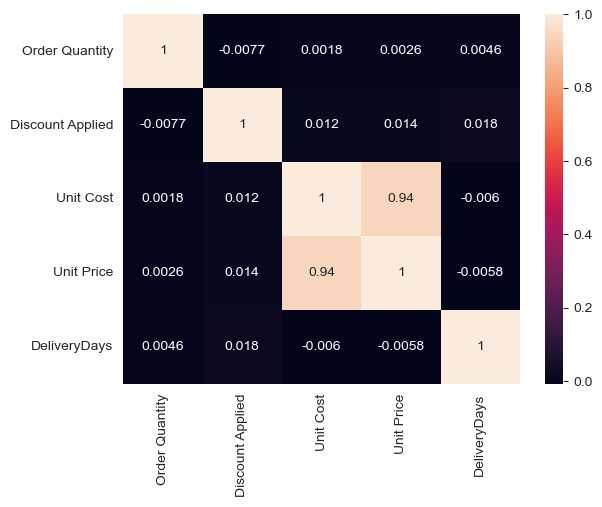

In [91]:
# Plot heatmap for visualization of correlation
sns.heatmap(corr, annot=True)

### Key Findings

- Only Unit Cost has highly positve correlation with target Unit Price.

In [92]:
# Save the data
cleaned_path = os.path.join(data_path, "US_Regional_Sales_Data_Cleaned.csv")
df.to_csv(cleaned_path, index= False)